<a href="https://colab.research.google.com/github/Ranvirsv/House_Price_Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1 (Importing libraries and dataset)

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [ ]:
from sklearn.datasets import load_boston
var = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
%matplotlib inline

In [ ]:
var.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

## Task 2 (Data exploration and preprocessing)

In [ ]:
print(var.feature_names)
print(var.DESCR)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial hig

In [ ]:
df = pd.DataFrame(var.data, columns=var.feature_names)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [ ]:
df.CRIM.describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [ ]:
df.TAX.describe()

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64

In [ ]:
df['MEDV'] = var.target

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Checking if all the dtypes in the dataframe are correct or not.

In [ ]:
df.dtypes 

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

 Checking for any null values in the dataframe.

In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Creating a box plot to check of outliers. Generally we remove
the rows having outliers from our data but for small dataset like Boston housing it can lead to a loss of a significant percentage of data.

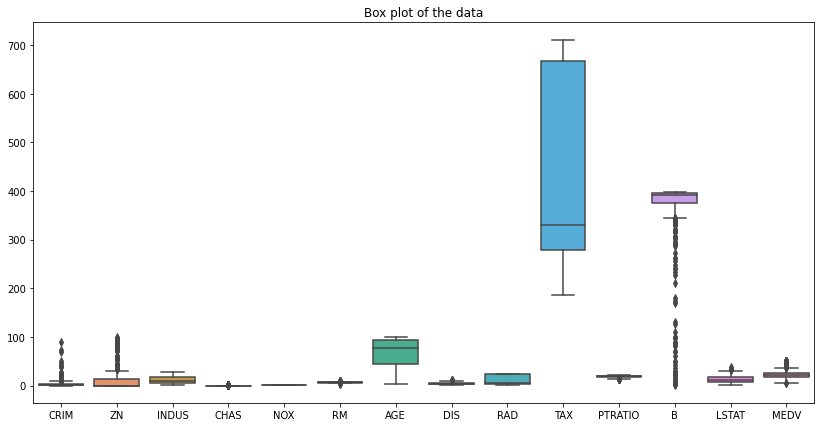

In [ ]:
plt.figure(figsize=(14, 7))
plt.title('Box plot of the data')
sns.boxplot(data=df)

Createing a heatmap using to find corelation between different features and
labels. In model creation we will be using features having a high corelation with our target label.

In [ ]:
corr = df.corr() # You need to find the correlation of the dataframe, before maping it.

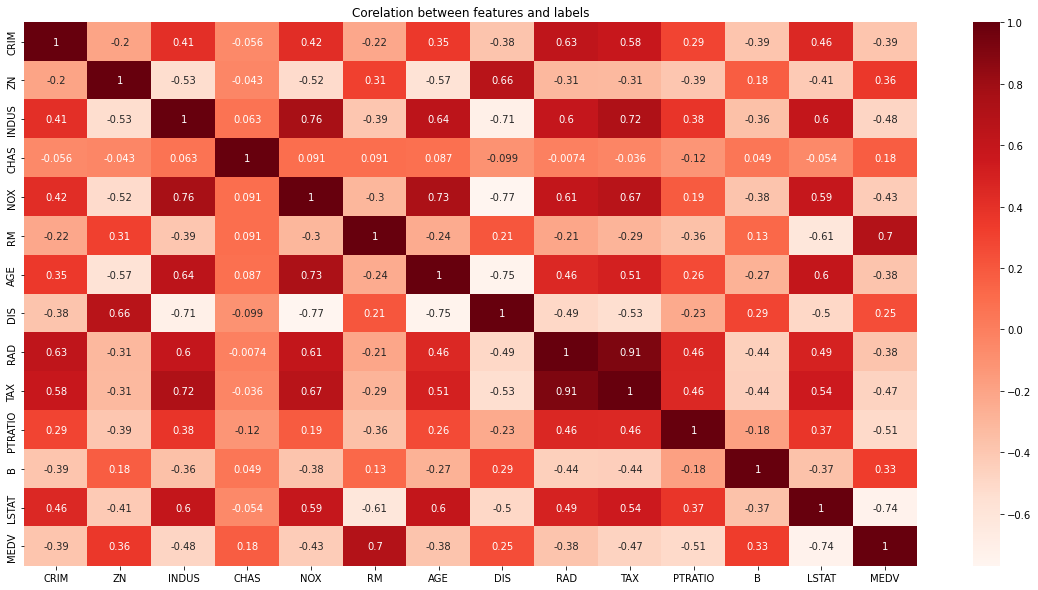

In [ ]:
plt.figure(figsize=(20, 10))
plt.title('Corelation between features and labels')
sns.heatmap(data=corr, annot=True, cmap=plt.cm.Reds)

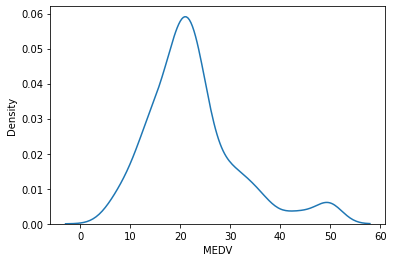

In [ ]:
sns.kdeplot(df['MEDV'])

## Task 3 (Model Implementation)

In [ ]:
X = df.drop("MEDV", 1)
Y = df["MEDV"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


### Selecting features from heatmap

In [ ]:
corr_target = abs(corr["MEDV"])
relevent_features = corr_target[corr_target>0.5]
relevent_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [ ]:
print(df[["LSTAT","PTRATIO"]].corr())
print(df[["RM","LSTAT"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000
             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000


since RM and LSTAT are highly co-related, we can just chose LSTAT, as it is more related to MEDV

### Extracting relevent features using backward elimination

In [ ]:
#Adding constant column of ones, mandatory for sm.OLS model
model_max = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
## Fitting sm.OLS model
model = sm.OLS(Y,model_max).fit()
model.pvalues

const      3.283438e-12
CRIM       1.086810e-03
ZN         7.781097e-04
INDUS      7.382881e-01
CHAS       1.925030e-03
NOX        4.245644e-06
RM         1.979441e-18
AGE        9.582293e-01
DIS        6.013491e-13
RAD        5.070529e-06
TAX        1.111637e-03
PTRATIO    1.308835e-12
B          5.728592e-04
LSTAT      7.776912e-23
dtype: float64

In [ ]:
## Backward selection

cols = list(X.columns)
pmax = 1

while(len(cols) > 0):
  p = []
  model_max = X[cols]
  model_max = sm.add_constant(model_max)
  model = sm.OLS(Y, model_max).fit()
  p = pd.Series(model.pvalues.values[1:],index = cols)    
  pmax = max(p)
  feature_with_pmax = p.idxmax()
  if pmax > 0.05:
    cols.remove(feature_with_pmax)
  else:
    break

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
selected_features_BE = list(cols)
print(selected_features_BE)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


### Extracting features using Embedded Method

In [ ]:
reg = LassoCV()
reg.fit(X, Y)
print("Best alpha using built-in LassoCV: %f" %reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,Y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.724820
Best score using built-in LassoCV: 0.702444


In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 10 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

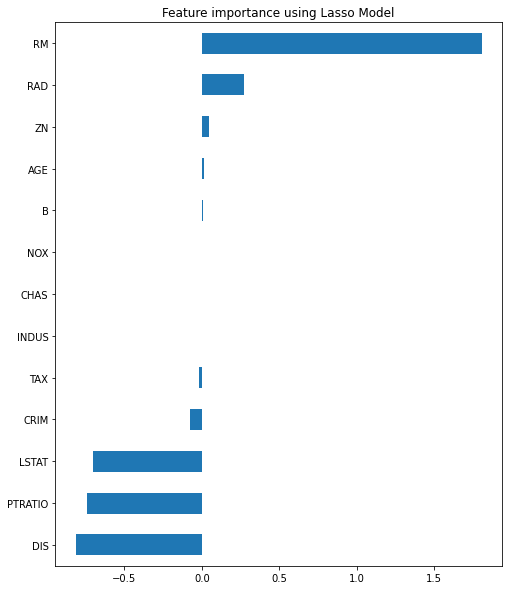

In [ ]:
lass_features = coef.sort_values()
plt.figure(figsize=(8,10))
lass_features.plot(kind='barh')
plt.title("Feature importance using Lasso Model")

Lasso choose every feature exept INDUS, CHAS and NOX

In [ ]:
lasso_choose_features = coef[coef != 0].keys()
lasso_choose_features

Index(['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')

Using revelent features to train the model
And compare the R2 score

In [ ]:
x1BE = df[selected_features_BE]
x1HM = df[['LSTAT', 'PTRATIO']]
x1LA = df[lasso_choose_features]

y1 = df['MEDV']

Split the data set in train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1BE, y1, test_size=0.33, random_state=5)  # R2(R squared) score: 0.69
# x_train, x_test, y_train, y_test = train_test_split(x1LA, y1, test_size=0.33, random_state=5): R2(R squared) score: 0.67
# x_train, x_test, y_train, y_test = train_test_split(x1H, y1, test_size=0.33, random_state=5):  R2(R squared) score: 0.56

Train the linear regression model on the traning data

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

Predict from the test data

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
Rdf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

## Task 4 (Testing the model)

Get the Absolute Mean and Mean Squared error, and R2 score


In [ ]:
import sklearn.metrics as metrics

In [ ]:
print(f"Absolute mean error:     {metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)}")
print(f"Mean squared error(VAR): {metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)}")
print(f"SD:                      {np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred))}")
print(f"R2(R squared) score:     {metrics.r2_score(y_true=y_test, y_pred=y_pred)}")

Absolute mean error:     3.4312353882948026
Mean squared error(VAR): 28.240686335113843
SD:                      5.314196678249107
R2(R squared) score:     0.698746274071917


Seeing that the R-squared score of around 0.7 with Backward Elimination model, there is good corelation between features, but there is still room for improvement

## Making some pair plots

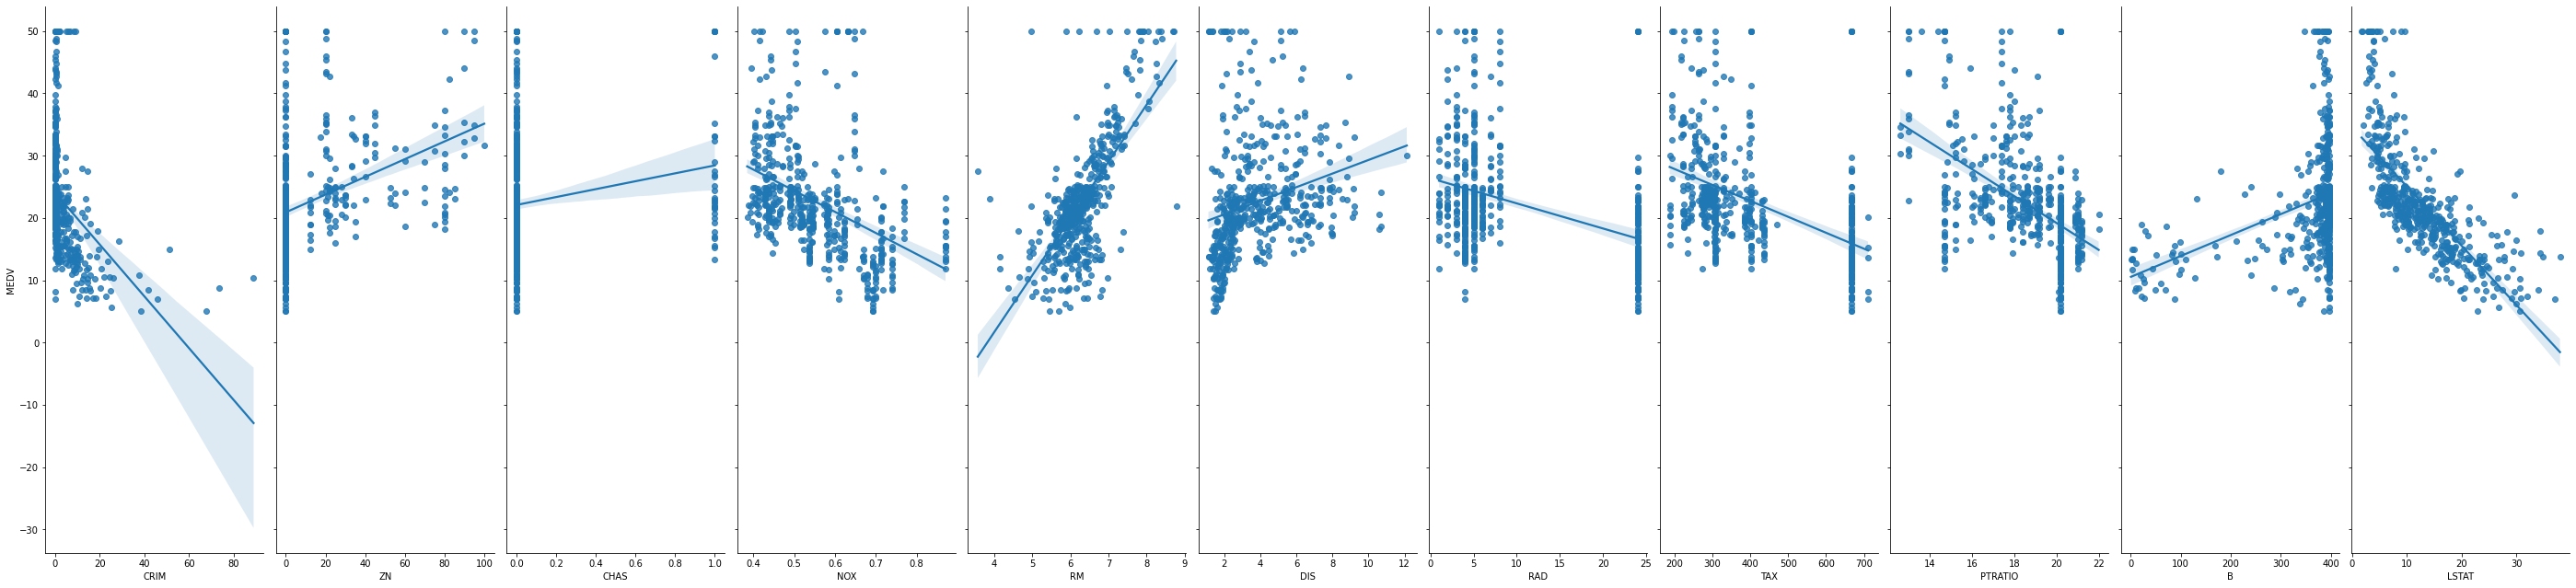

In [ ]:
sns.pairplot(df, x_vars=selected_features_BE, y_vars='MEDV', height = 9, aspect = .4, kind = 'reg')